In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.linalg import block_diag

path = 'data/'

def cut_indices(data):
    columns_cut = ['Axe','Segment', 'Arrondissement', 'Desservance', 'Secteur Entretien', 'Classe de route_num', 'Declassement']
    changes_all = data[columns_cut].shift(1) != data[columns_cut]
    changes = changes_all.any(axis=1)
    return np.append(changes[changes].index.values, len(data))

def adjust(x):
    y=np.array(x)
    for i in range(1,len(y)):
        if y[i]>1+y[i-1]:
            y[i:] = y[i:] + y[i-1] - y[i] + 1
    return y

def compare(y_true,y_pred,title='Comparison of two labelizations'):
    plt.figure(figsize=(14,5))
    plt.plot(adjust(y_true),'o', label=y_true.name,alpha=1)
    plt.plot(adjust(y_pred),'o', label=y_pred.name,alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel('Road pavement position')
    plt.ylabel('Cluster label')
    plt.show()

df = pd.read_excel('data/first_axis_labels.xlsx')
pd.options.mode.chained_assignment = None


def measure_homogeneity_aux(x):
    v = x.value_counts()
    optimal_percent = max(v)/sum(v) * 100

    optimal_measure = v.idxmax()
    k_max=0
    i=0
    while i < len(x):
        if (x.iloc[i]==optimal_measure):
            i+=1
        else:
            j = 1
            k=1
            while ((i+j)<len(x)):
                if (x.iloc[i+j]==x.iloc[i]):
                    j= j+1
                    k = k+1
                else:
                    j = len(x)
            k_max = max(k_max,k)
            i = i+k
    return (np.round(optimal_percent,1), k_max)

def measure_homogeneity(labels, measures):
    x = pd.concat([labels,measures.loc[labels.index]],axis=1).groupby(labels.name)[measures.name]
    return x.apply(measure_homogeneity_aux)
    


# Sections data

In [13]:
sections = pd.read_excel(path+'road_sections.xlsx')

In [ ]:
sections.shape

(34116, 77)

In [ ]:
sections.head()

,FILENAME,Date,Axe,Segment,PR début,U début [m],PR fin,U fin [m],distance axe début m,distance axe fin m,...,Décl_21,Décl_22,Décl_23,Décl_24,Décl_25,Mesure optimale,Année optimale,test continuité,incrément chantiers,n°chantiers long
0,98R1AII4,2019-08-27 16:44:28,1,96,0,0,0,50,0.0,50.000,...,RT,RT,RT,RT,RT,RT,7,0,1,1_1
1,98R1AII4,2019-08-27 16:44:28,1,96,0,50,0,100,50.0,100.000,...,RT,RT,RT,RT,RT,RT,7,1,1,1_1
2,98R1AII4,2019-08-27 16:44:28,1,96,0,100,0,150,100.0,150.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
3,98R1AII4,2019-08-27 16:44:28,1,96,0,150,0,200,150.0,200.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
4,98R1AII4,2019-08-27 16:44:28,1,96,0,200,0,225,200.0,225.282,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2


In [24]:
axis = sections[sections.Axe == 10]
axis.to_excel('data/axis_2.xlsx', index=False)

# First axis

In [4]:
data = pd.read_excel(path+'first_axis.xlsx')

In [3]:
data.head()

,FILENAME,Date,Axe,Segment,PR début,U début [m],PR fin,U fin [m],distance axe début m,distance axe fin m,...,Décl_21,Décl_22,Décl_23,Décl_24,Décl_25,Mesure optimale,Année optimale,test continuité,incrément chantiers,n°chantiers long
0,98R1AII4,2019-08-27 16:44:28,1,96,0,0,0,50,0.0,50.000,...,RT,RT,RT,RT,RT,RT,7,0,1,1_1
1,98R1AII4,2019-08-27 16:44:28,1,96,0,50,0,100,50.0,100.000,...,RT,RT,RT,RT,RT,RT,7,1,1,1_1
2,98R1AII4,2019-08-27 16:44:28,1,96,0,100,0,150,100.0,150.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
3,98R1AII4,2019-08-27 16:44:28,1,96,0,150,0,200,150.0,200.000,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2
4,98R1AII4,2019-08-27 16:44:28,1,96,0,200,0,225,200.0,225.282,...,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,DO NOT,26,1,2,1_2


In [4]:
def cut_indices(data):
    columns_cut = ['Axe','Segment', 'Arrondissement', 'Desservance', 'Secteur Entretien', 'Classe de route_num', 'Declassement']
    changes_all = data[columns_cut].shift(1) != data[columns_cut]
    changes = changes_all.any(axis=1)
    return np.append(changes[changes].index.values, len(data))

In [5]:
a = data[['Segment','Desservance']].shift(1) != data[["Segment",'Desservance']]
b = a.any(axis=1)
b[b].index.values

array([  0,   9,  47, 188, 193], dtype=int64)

In [6]:
cut_ind= cut_indices(data)

## Clustering K means

In [2]:
def renum(a):
    k=0
    d={a[0]:0}
    for i in range(len(a)):
        try :
            a[i] = d[a[i]]
        except :
            k+=1
            d[a[i]] = k
            a[i] = k
    return a     

In [4]:
# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_All'

# columns = ['distance axe début m', 'Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_Note'

# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
# st='_0_3'

columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
st='_1_3'

data = pd.read_excel(path+'axis_2.xlsx')
X = data[columns]
X = X.replace({'-':None}).astype('float64')
X = X.fillna(X.median())
y = data['incrément chantiers']

cut_ind= cut_indices(data)
n_cut = len(cut_ind)-1

In [9]:
from sklearn.cluster import KMeans

# Ks = [3,3,6,1,1]

cuts = cut_ind
y_kmeans = np.array([])
max_prev=0

for i in range(n_cut):
    X_cut = X[cuts[i]:cuts[i+1]]
    y_cut = y[cuts[i]:cuts[i+1]]
    k = len(y_cut.unique()) # Ks[i]
    kmeans = KMeans(n_clusters=k).fit(X_cut)

    y_i=renum(kmeans.labels_)+max_prev+1
    
    # print(k)
    # print(y_i)
    # print(np.array(y_cut))
    # print('')

    y_kmeans = np.append(y_kmeans, y_i)
    max_prev = y_kmeans[-1]

C:\Users\POSTE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\POSTE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\POSTE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\POSTE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

In [43]:
try :
    to_save = pd.read_excel('data/axis_2_labels.xlsx')
except :
    to_save = X.copy()

to_save['Ref_label'] = y
to_save['Kmeans_label'+st] = y_kmeans.astype('int32')

to_save.to_excel('data/axis_2_labels.xlsx', index=False)

In [10]:
y_kmeans

array([ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 17

## Divisive clustering

In [33]:
# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_All'

# columns = ['distance axe début m', 'Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]
# st='_Note'

# columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
# st='_0_3'

columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]
st='_1_3'

X = data[columns]
X = X.replace({'-':None}).astype('float64')
X = X.fillna(X.median())
y = data['incrément chantiers']

cuts = cut_indices(data)
n_cut = len(cuts)-1

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Ks = [3,3,6,1,1]

y_hier = np.array([])
max_prev=0


for i in range(n_cut):
    X_cut = X[cuts[i]:cuts[i+1]]
    y_cut = y[cuts[i]:cuts[i+1]]
    k = len(y_cut.unique()) #  Ks[i]
    clf = AgglomerativeClustering(n_clusters=k).fit(X_cut)
    
    y_i=renum(clf.labels_)+max_prev+1

    # print(k)
    # print(y_i)
    # print(np.array(y_cut))
    # print('')

    y_hier = np.append(y_hier, y_i)
    max_prev = y_hier[-1]

In [36]:
try :
    to_save = pd.read_excel('data/axis_2_labels.xlsx')
except :
    to_save = X.copy()

to_save['Hier_label'+st] = y_hier
to_save.to_excel('data/axis_2_labels.xlsx', index=False)

## Features importance

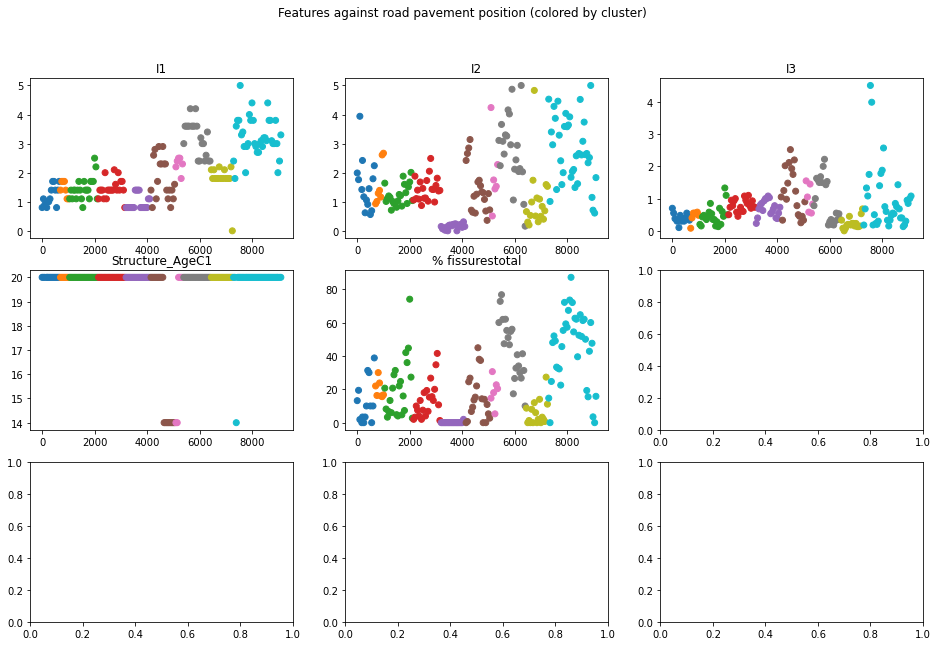

In [29]:
fig,axes = plt.subplots(len(columns)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()[:-1]):
    if i < len(columns)-1:
        ax.scatter(X['distance axe début m'],X[columns[i+1]], c = y,cmap='tab10')
        ax.set_title(columns[i+1])
plt.suptitle('Features against road pavement position (colored by cluster)')
plt.show()

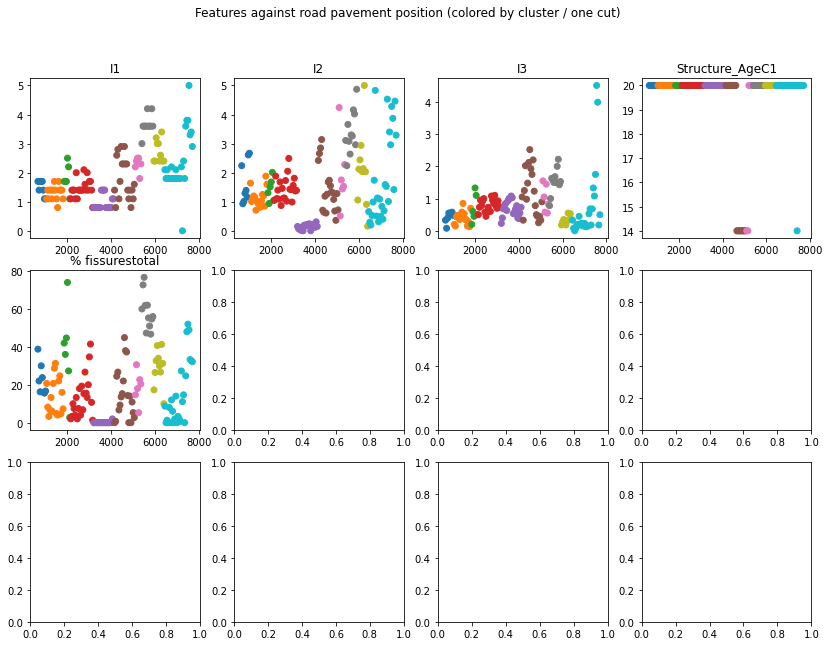

In [30]:
i=2

X_cut = X[cuts[i]:cuts[i+1]]
y_cut = y[cuts[i]:cuts[i+1]]

fig,axes = plt.subplots(len(columns)//3 + 1,4, figsize=(14,10))
for i,ax in enumerate(axes.flatten()[:-1]):
    if i < len(columns)-1:
        ax.scatter(X_cut['distance axe début m'],X_cut[columns[i+1]], c = y_cut,cmap='tab10')
        ax.set_title(columns[i+1])
plt.suptitle('Features against road pavement position (colored by cluster / one cut)')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_cut, y_cut)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(X_cut.iloc[:].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)



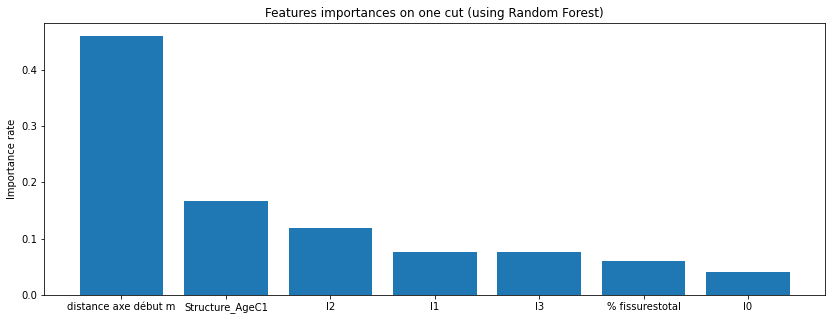

In [37]:
# Show
plt.figure(figsize=(14,5))
plt.bar(most_important_features, most_important_weights)
plt.title('Features importances on one cut (using Random Forest)')
plt.ylabel('Importance rate')
plt.show()

In [123]:
sections = pd.read_excel(path+'road_sections.xlsx')
cut_ind_all = cut_indices(sections)

columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]

data_all = sections[columns]
label_all = sections['incrément chantiers']

data_all = data_all.replace({'-':None}).astype('float64')
data_all = data_all.fillna(data_all.median())

label_all[10370]=1  # Missing label
label_all = label_all.astype('string')

<ipython-input-123-ad00265a4697>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_all[10370]=1  # Missing label


In [151]:
columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note',"% fissurestotal"]

In [125]:
import tqdm
weights = np.zeros(len(columns))

for i in tqdm.tqdm(range(len(cut_ind_all)-1)):
    X_cut = data_all[cut_ind_all[i]:cut_ind_all[i+1]]
    y_cut = label_all[cut_ind_all[i]:cut_ind_all[i+1]]
    
    clf = RandomForestClassifier()
    clf.fit(X_cut, y_cut)

    weights += clf.feature_importances_

print(weights / (len(cut_ind_all)-1))

100%|██████████| 607/607 [01:40<00:00,  6.04it/s]

[0.17975246 0.05392793 0.0526083  0.03926769 0.04190536 0.06221781
 0.02371868 0.03046486 0.00970743 0.02661469 0.0141997  0.05375347]


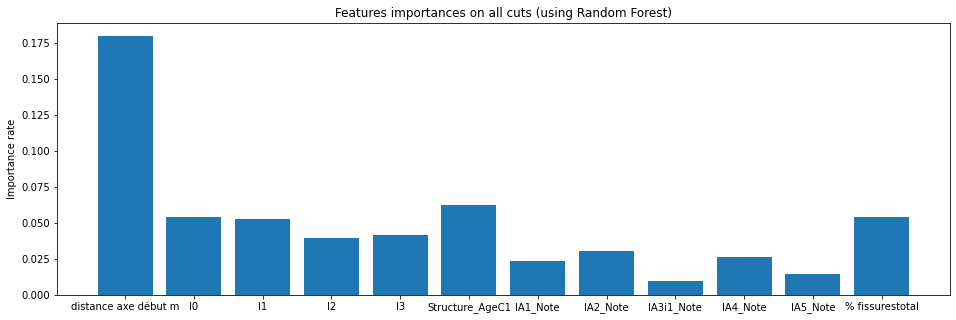

In [133]:
plt.figure(figsize=(16,5))
plt.bar(columns, weights / (len(cut_ind_all)-1))
plt.title('Features importances on all cuts (using Random Forest)')
plt.ylabel('Importance rate')
plt.show()

In [169]:
weights_to = [0.17975246, 0.05392793, 0.0526083,  0.03926769, 0.04190536, 0.06221781, 0.02371868, 0.03046486, 0.00970743, 0.02661469, 0.0141997,  0.05375347]
weights_df = pd.DataFrame(weights_to, index=columns, columns=['weight'])
weights_df.to_csv('data/weights.csv', index=True)

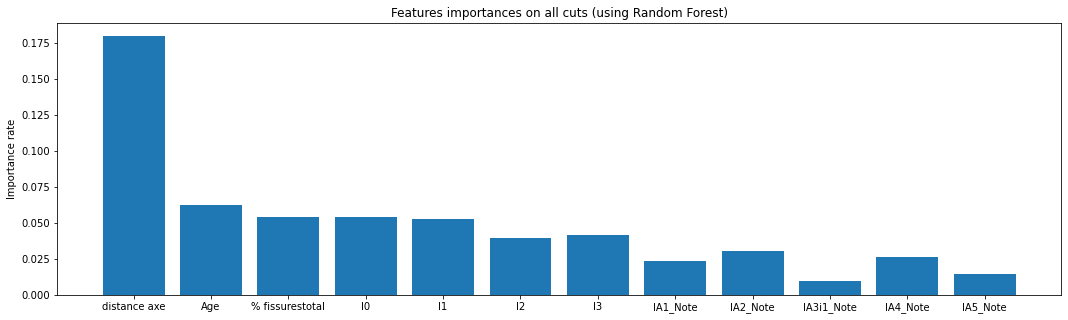

In [50]:
columns = ['distance axe début m','Structure_AgeC1',"% fissurestotal" ,'I0', 'I1', 'I2', 'I3', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note']
columns_bis = ['distance axe','Age',"% fissurestotal" ,'I0', 'I1', 'I2', 'I3', 'IA1_Note', 'IA2_Note', 'IA3i1_Note', 'IA4_Note','IA5_Note']

weights_ = pd.read_csv('data/weights.csv',index_col=0)
weights = weights_.loc[columns].weight.values

plt.figure(figsize=(18,5))
plt.bar(columns_bis, weights)
plt.title('Features importances on all cuts (using Random Forest)')
plt.ylabel('Importance rate')
plt.show()

## Visualization

In [13]:
def adjust(x):
    y=np.array(x)
    for i in range(1,len(y)):
        if y[i]>1+y[i-1]:
            y[i:] = y[i:] + y[i-1] - y[i] + 1
    return y

def compare(y_true,y_pred):
    plt.figure(figsize=(14,5))
    plt.plot(adjust(y_true),'o', label=y_true.name,alpha=1)
    plt.plot(adjust(y_pred),'o', label=y_pred.name,alpha=0.5)
    plt.legend()
    plt.title('Comparison of two labelizations')
    plt.xlabel('Road pavement position')
    plt.ylabel('Cluster label')
    plt.show()

In [26]:
df = pd.read_excel('data/first_axis_labels.xlsx')

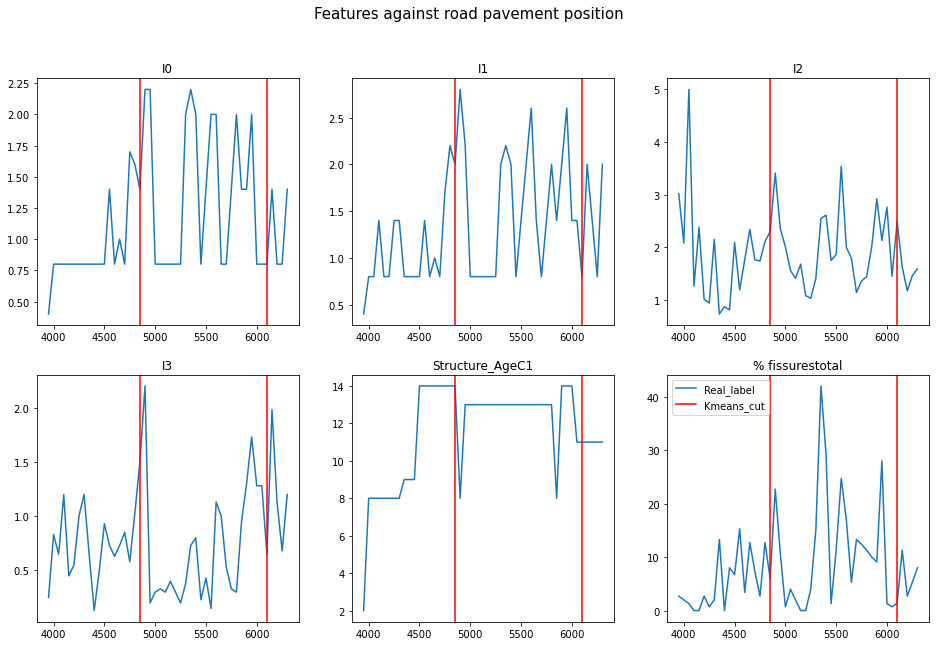

In [15]:
X = df[df.Real_label==8]
y = X.Real_label
columns = ['distance axe début m', 'I0', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]


fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.plot(X['distance axe début m'],X[columns[i+1]], label='Real_label')
        ax.axvline(4850.0, color='red', label='Kmeans_cut')
        ax.axvline(6100.0, color='red')
        ax.set_title(columns[i+1])
plt.legend()
plt.suptitle('Features against road pavement position',fontsize=15)
plt.show()

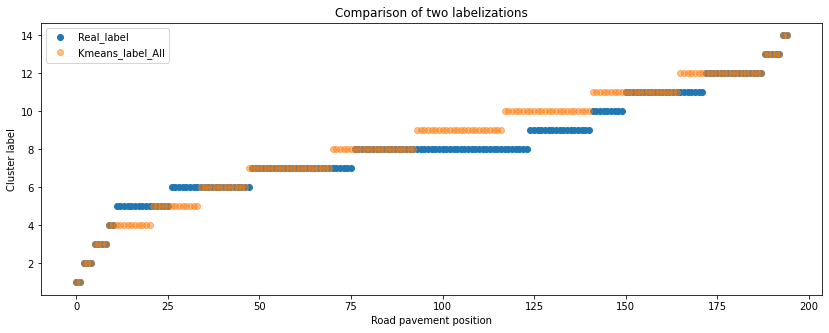

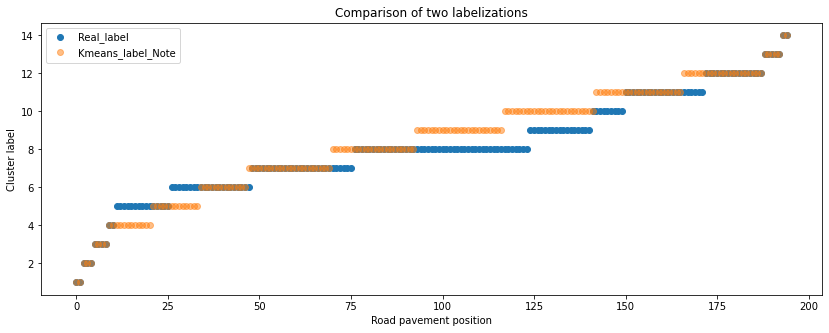

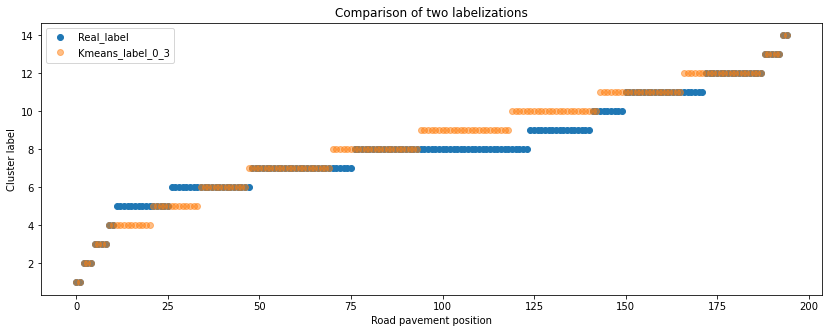

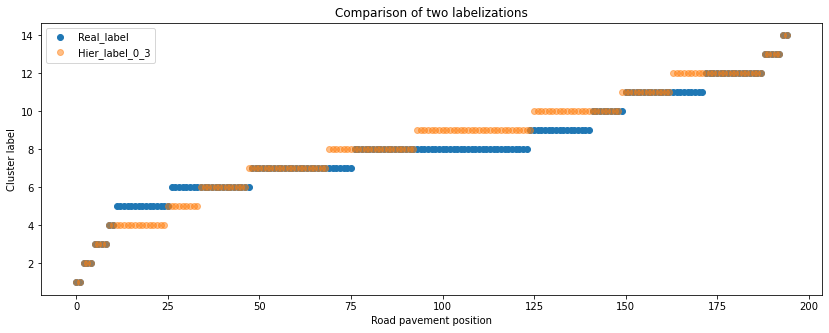

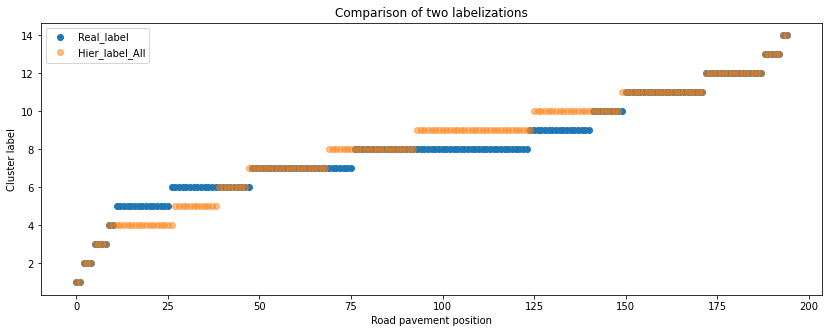

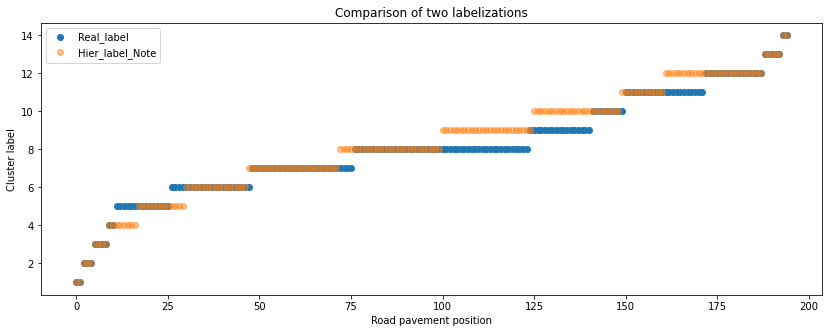

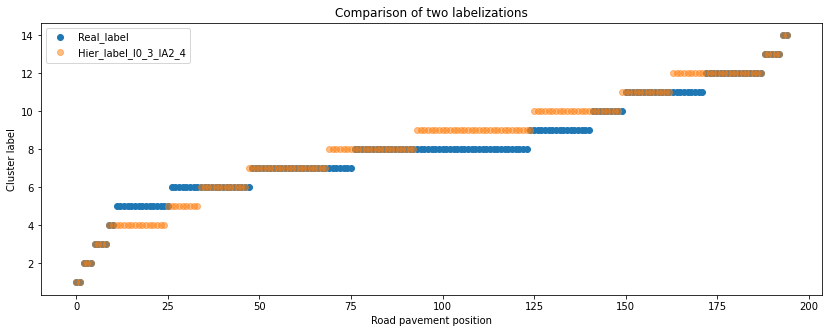

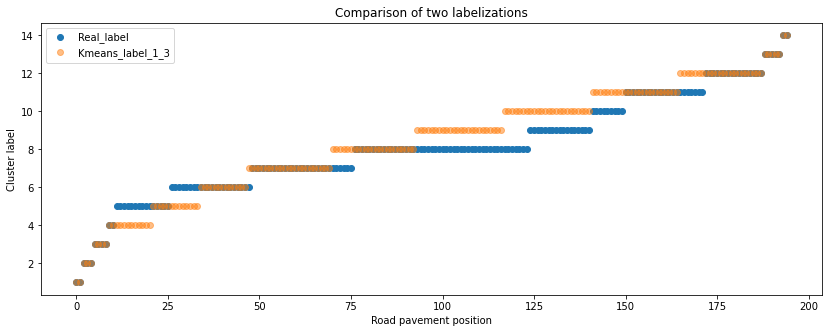

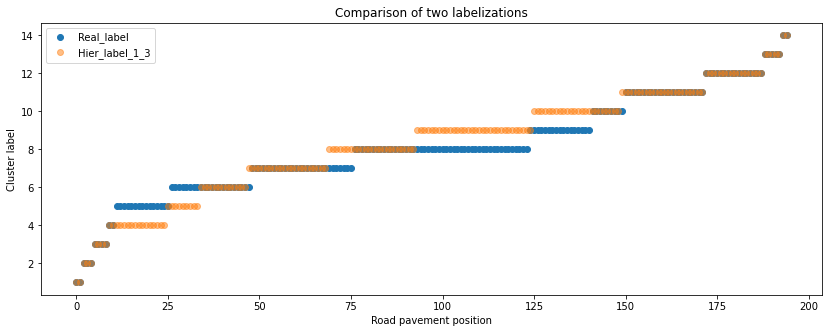

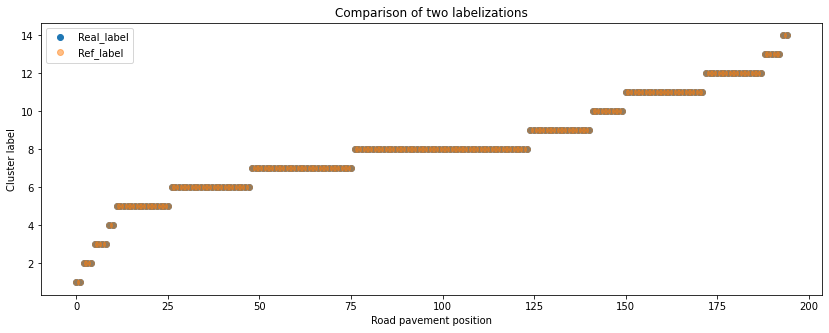

In [48]:
df = pd.read_excel('data/first_axis_labels.xlsx')

import re
for c in df.loc[:,[True if re.search('label',column) else False for column in df.columns]].columns[1:]:
    compare(df['Real_label'], df[c])

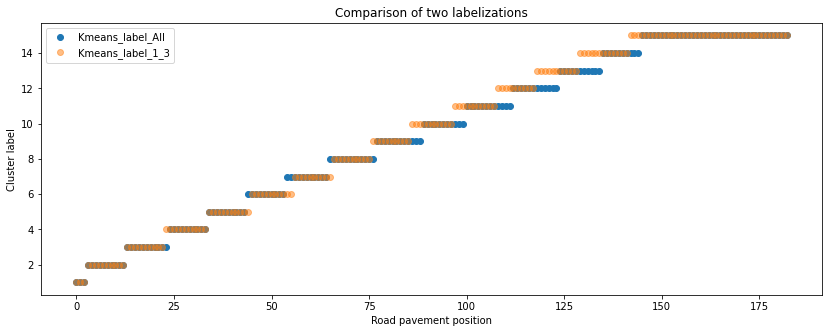

In [47]:
compare(df['Kmeans_label_All'], df['Kmeans_label_1_3'])

## Divisive hand made

In [76]:
data = pd.read_excel(path+'first_axis.xlsx')

columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]

X = data[columns]
X = X.replace({'-':None}).astype('float64')
X = X.fillna(X.median())
y = data['incrément chantiers']

cuts = cut_indices(data)
n_cut = len(cuts)

X_norm_0 = X.drop('distance axe début m',axis=1)
X_norm = (X_norm_0 - X_norm_0.min()) / (X_norm_0.max() - X_norm_0.min())

X_norm_1 = X.copy()
X_norm1 = (X_norm_1 - X_norm_1.min()) / (X_norm_1.max() - X_norm_1.min())


measures_ref = data['Mesure optimale']
years_ref = data['Année optimale']

In [68]:
def distance_matrix(X):
    dist=np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(i):
            dist[i][j] = np.linalg.norm(X.iloc[i]-X.iloc[j])
            dist[j][i] = dist[i][j]
    return dist

weights_ = pd.read_csv('data/weights.csv',index_col=0)
weights = weights_.loc[columns].weight.values

def distance_matrix_weighted(X):
    dist=np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(i):
            dist[i][j] = np.linalg.norm((X.iloc[i]-X.iloc[j])*weights)
            dist[j][i] = dist[i][j]
    return dist
    
def distance_centers(clus_1,clus_2):
    return np.linalg.norm(np.mean(clus_1)-np.mean(clus_2))


In [69]:
from scipy.linalg import block_diag

blocks = []
for i in range(n_cut-1):
    X_cut = X[cuts[i]:cuts[i+1]].copy()
    blocks.append(distance_matrix(X_cut))
dist_og = block_diag(*blocks)

blocks_norm = []
for i in range(n_cut-1):
    X_cut = X_norm1[cuts[i]:cuts[i+1]].copy()
    blocks_norm.append(distance_matrix(X_cut))
dist_norm = block_diag(*blocks_norm)

blocks_norm = []
for i in range(n_cut-1):
    X_cut = X_norm[cuts[i]:cuts[i+1]].copy()
    blocks_norm.append(distance_matrix(X_cut))
dist_norm_wod = block_diag(*blocks_norm)

In [4]:
def split(X):
    max_ind=0
    max_dist=0
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = distance_centers(clus_1,clus_2)
        if d > max_dist:
            max_ind = i
            max_dist = d
    return X[:max_ind],X[max_ind:],max_dist

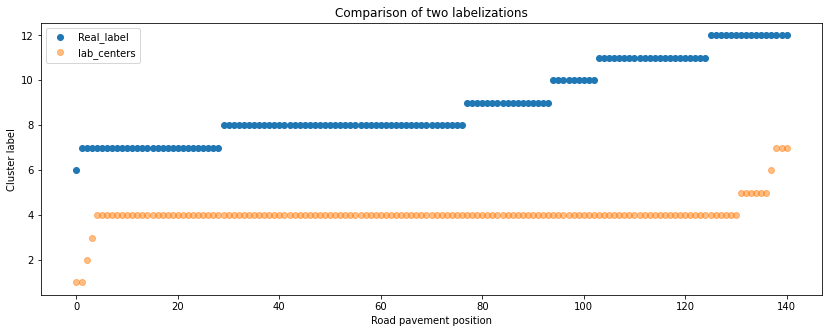

In [30]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split(clusters[i])
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_centers'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_centers)

In [73]:
def UPGMA(clus_1, clus_2, dist):
    sum = 0
    for i in clus_1.index:
        for j in clus_2.index:
            sum += dist[i,j]
    return sum /(len(clus_1)*len(clus_2))

def split_UPGMA(X,dist):
    max_ind=0
    max_dist=0
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = UPGMA(clus_1,clus_2,dist)
        if d > max_dist:
            max_ind = i
            max_dist = d
    return X[:max_ind],X[max_ind:],max_dist

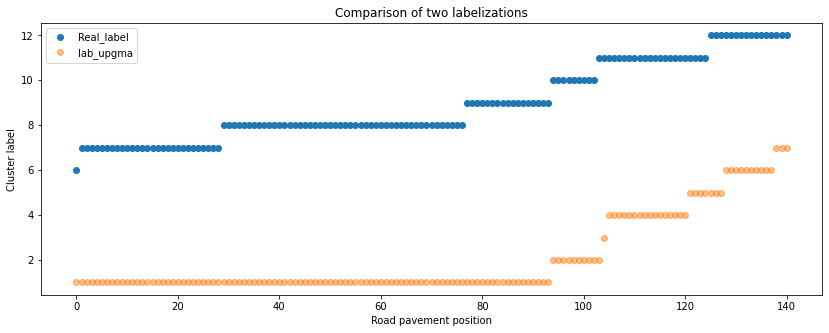

In [51]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]


n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = dist_og
for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_UPGMA(clusters[i],dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_upgma'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_upgma)

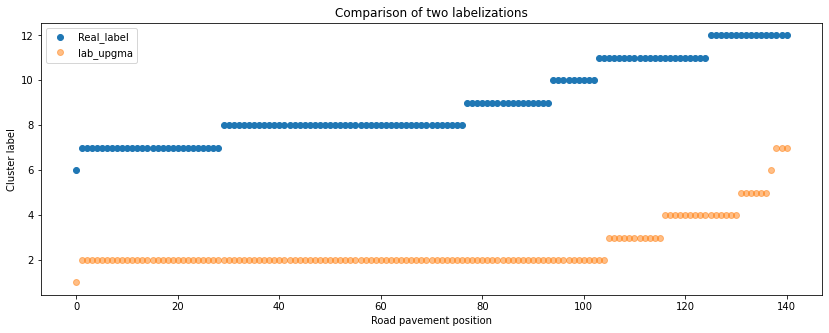

In [52]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]


n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = dist_norm
for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_UPGMA(clusters[i],dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_upgma'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_upgma)

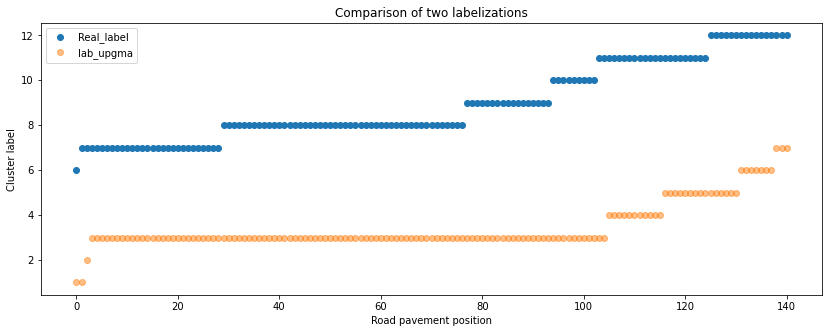

In [57]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]


n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = dist_norm_wd
for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_UPGMA(clusters[i],dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_upgma'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_upgma)

### Try with rules

In [8]:
def rules_length(cluster):
    if len(cluster)<5:
        return False
    if len(cluster)>40:
        return False
    return True

def split_r(X, rules, dist=None,upgma=False):
    max_ind=0
    max_dist=0
    max_ind_rules=0
    max_dist_rules=0
    respect=False
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        if upgma:
            d = UPGMA(clus_1,clus_2,dist)
        else:
            d = distance_centers(clus_1,clus_2)
        if d > max_dist:
            max_ind = i
            max_dist = d
        if (rules(clus_1))|(rules(clus_2)):
            if d>max_dist_rules:
                max_ind_rules = i
                max_dist_rules = d
                respect = True
    if respect:
        return X[:max_ind_rules],X[max_ind_rules:],max_dist_rules
    return X[:max_ind],X[max_ind:],max_dist

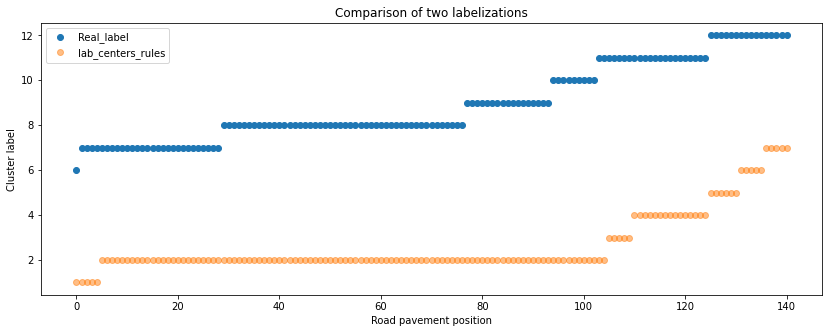

In [9]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
# dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_centers_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_centers_rules)

<ipython-input-12-70028e6efb31>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_UPGMA_rules'] = k+1


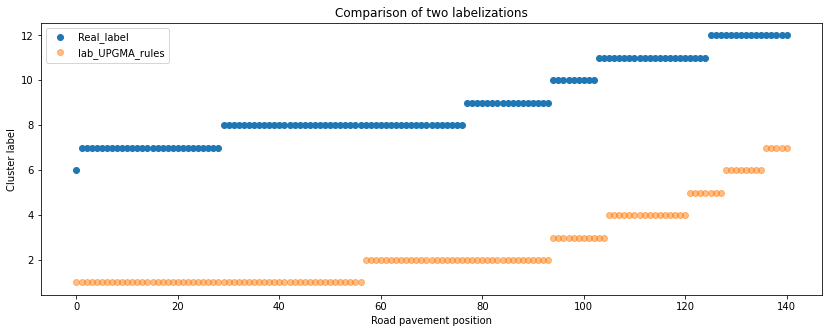

In [12]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length,dist,upgma=True)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_UPGMA_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules)

### Rules for years and measures

In [63]:
def rules_length_measure(cluster):
    measure = measures.loc[cluster.index]

    if len(cluster)<5:
        return False
    if len(cluster)>40:
        return False
    main_measure = measure.value_counts().sort_values().index[-1]
    for i in range(len(measure)-5):
        if (measure.iloc[i]!=main_measure) & ((measure.iloc[i:i+5]==measure.iloc[i]).sum() == 5):
            return False
    return True


def rules_length_measure_year(cluster):
    measure = measures.loc[cluster.index]
    year = years.loc[cluster.index]

    if len(cluster)<5:
        return False
    if len(cluster)>40:
        return False
    main_measure = measure.value_counts().sort_values().index[-1]
    for i in range(len(measure)-5):
        if (measure.iloc[i]!=main_measure) & ((measure.iloc[i:i+5]==measure.iloc[i]).sum() == 5):
            return False
    if (max(year) - min(year))>5:
        return False
    return True
    

In [64]:
def split_r(X, rules, dist=None):
    max_ind=0
    max_dist=0
    max_ind_rules=0
    max_dist_rules=0
    respect=False
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = UPGMA(clus_1,clus_2,dist) # UPGMA(clus_1,clus_2,dist) distance_centers(clus_1,clus_2)
        if d > max_dist:
            max_ind = i
            max_dist = d
        if (rules(clus_1))|(rules(clus_2)):
            if d>max_dist_rules:
                max_ind_rules = i
                max_dist_rules = d
                respect = True
    if respect:
        return X[:max_ind_rules],X[max_ind_rules:],max_dist_rules
    return X[:max_ind],X[max_ind:],max_dist

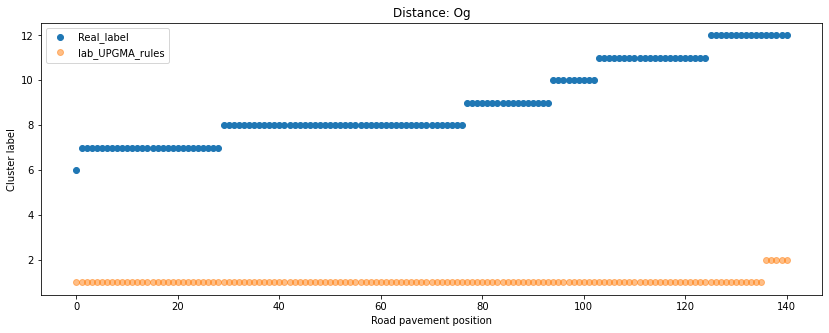

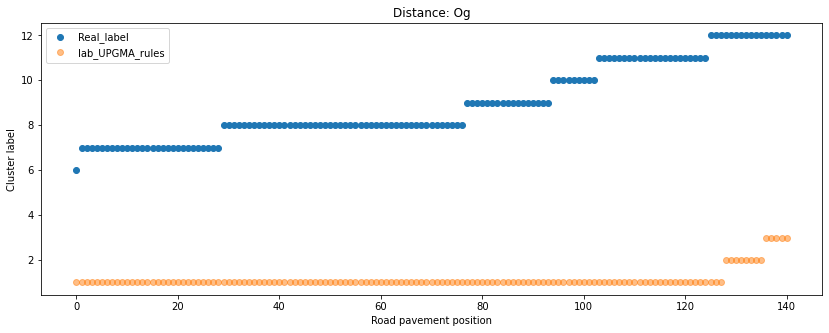

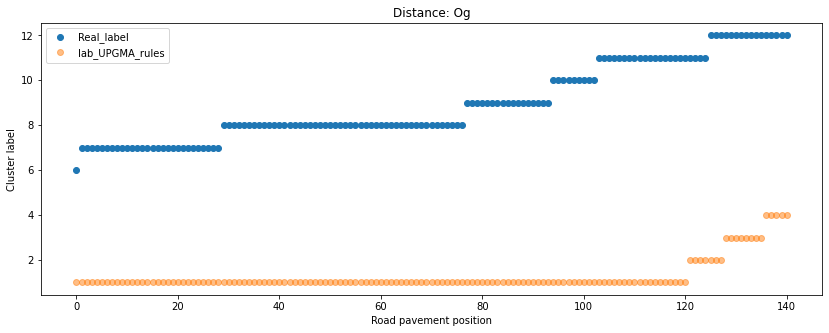

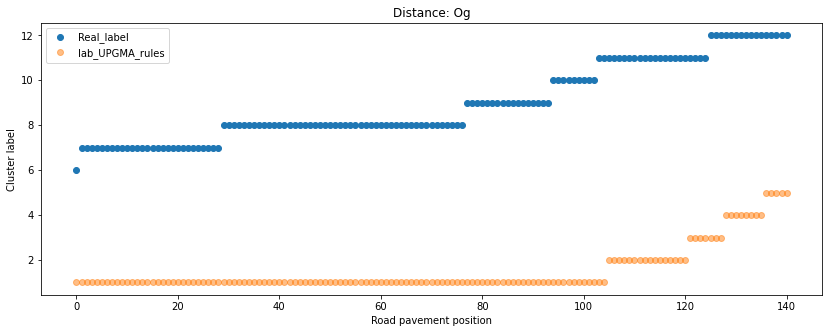

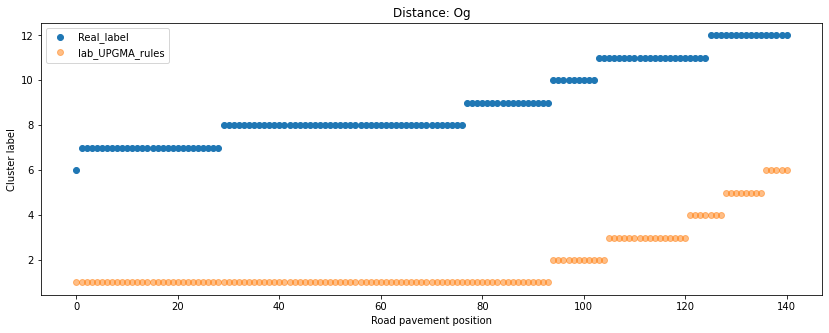

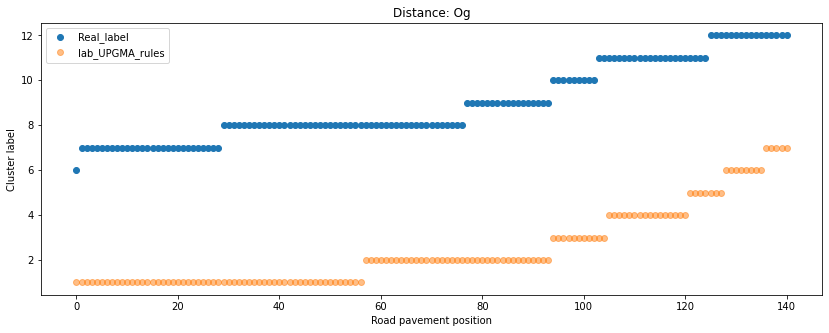

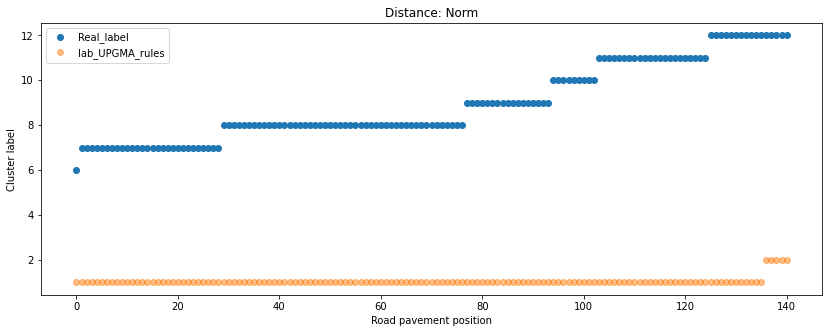

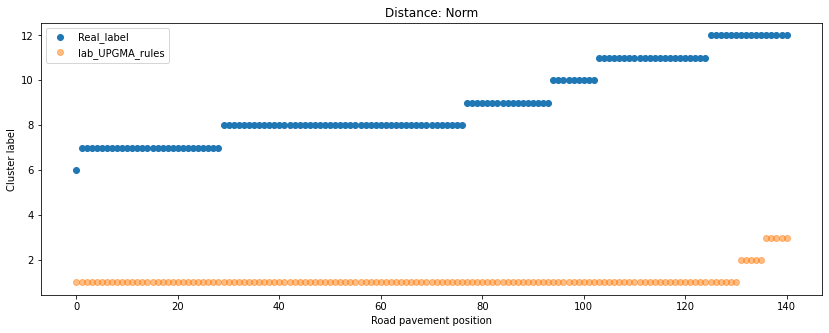

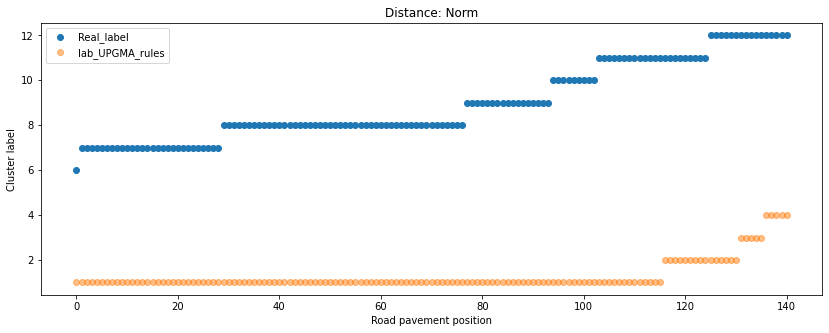

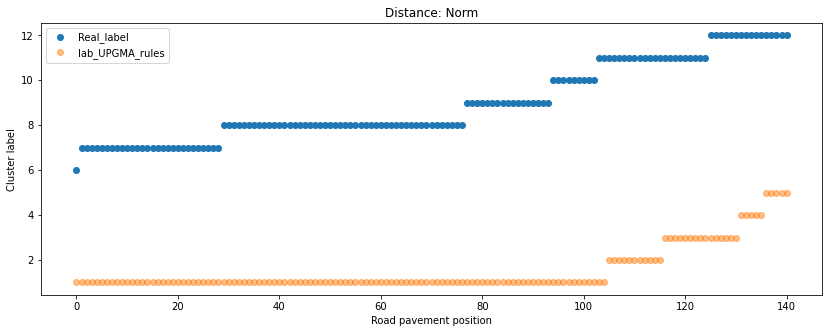

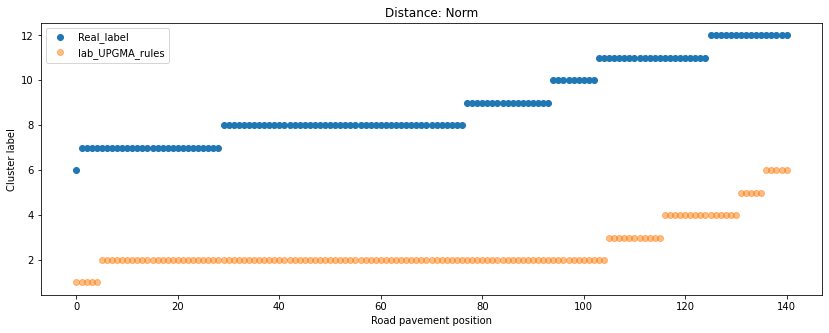

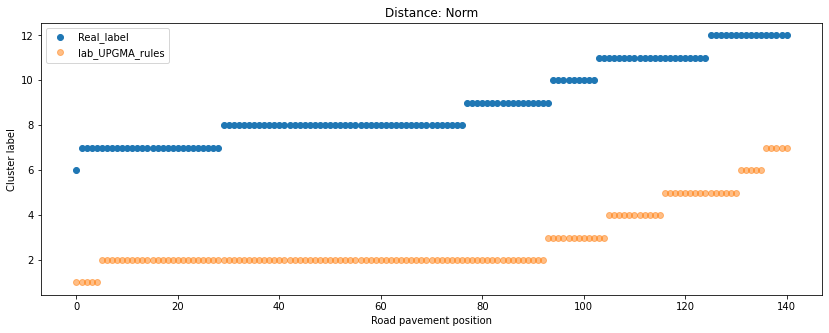

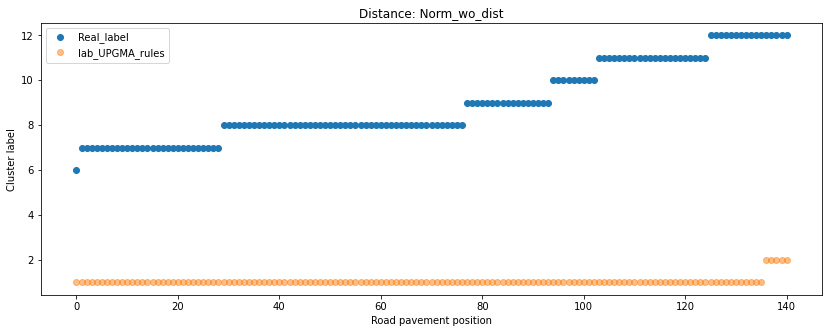

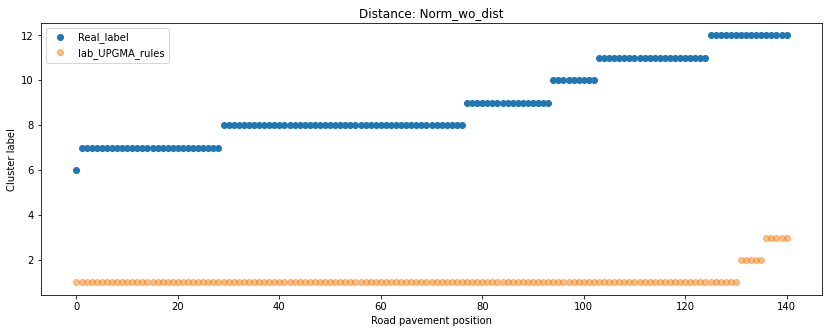

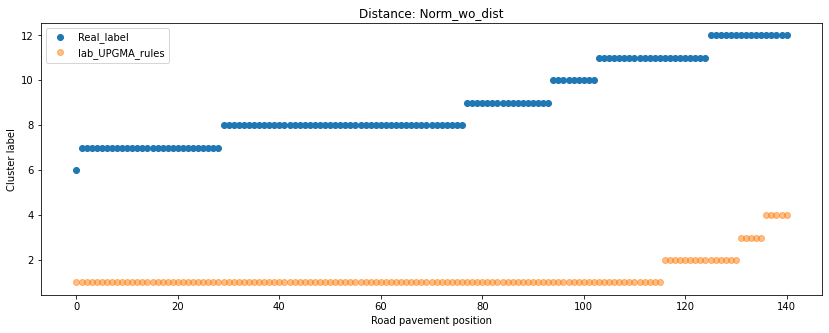

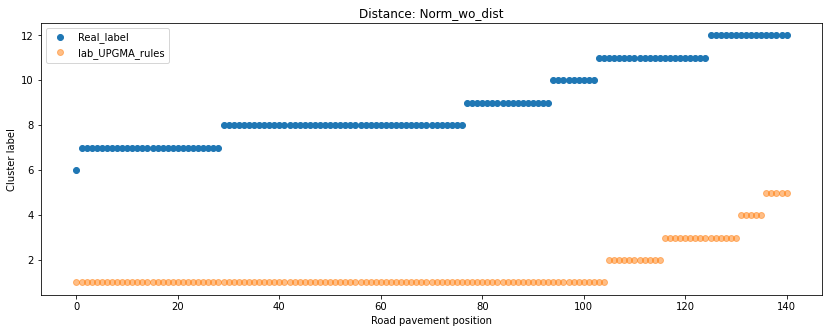

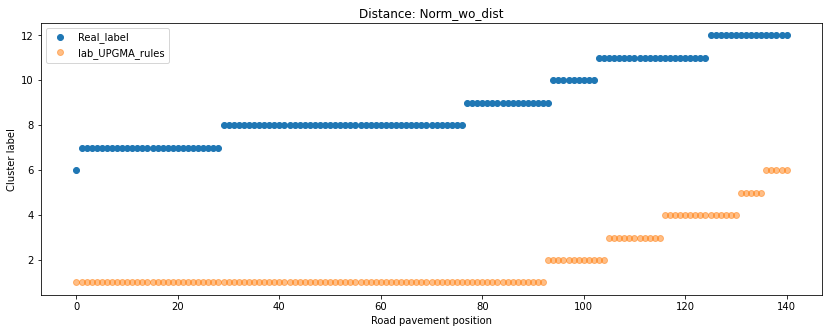

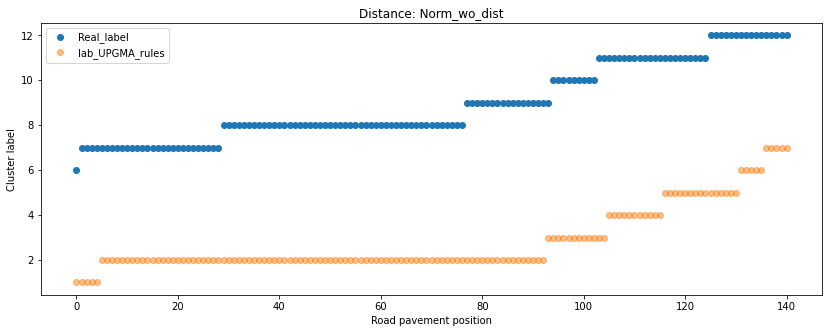

In [75]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist_labels = ["Og", "Norm", "Norm_wo_dist"]

for l,dist in enumerate([dist_og,dist_norm,dist_norm_wod]):
    clusters = [X_cut]
    for i in range(n_split):
        i = np.argmax([len(c) for c in clusters])
        X_new1,X_new2,_=split_r(clusters[i],rules_length_measure,dist)
        clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

        for k,c in enumerate(clusters):
            c['lab_UPGMA_rules'] = k+1

        ans = pd.concat(clusters)
        compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules, title = 'Distance: '+ dist_labels[l])

<ipython-input-68-e4807b2ceaf3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_UPGMA_rules'] = k+1


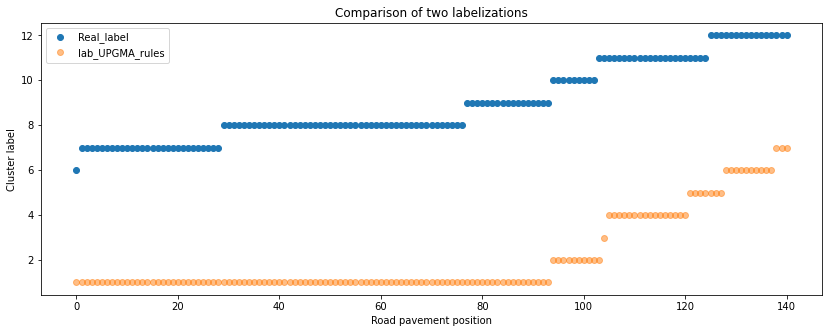

In [68]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([len(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length_measure_year,dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_UPGMA_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules)

### Diameter instead of largest

In [81]:
def diameter(cluster):
    d=0
    for i in range(len(cluster)):
        for j in range(i):
            d = np.maximum(np.linalg.norm(cluster.iloc[j] - cluster.iloc[i]),d)
    return d

In [82]:
diameter(X_cut)

1.4587011277649082

<ipython-input-83-644d31d9e670>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['lab_UPGMA_rules'] = k+1


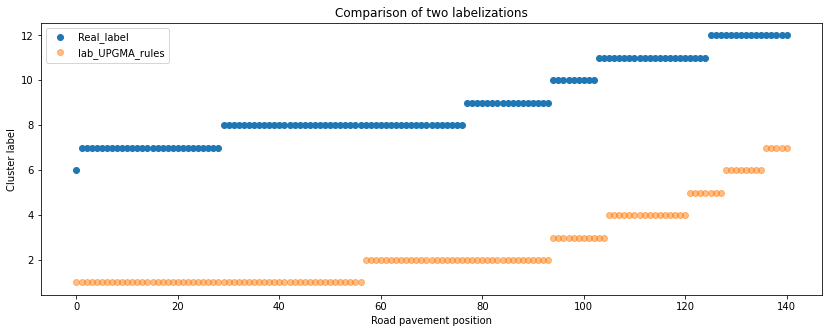

In [83]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [X_cut]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)

for i in range(n_split):
    i = np.argmax([diameter(c) for c in clusters])
    X_new1,X_new2,_=split_r(clusters[i],rules_length,dist)
    clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

for k,c in enumerate(clusters):
    c['lab_UPGMA_rules'] = k+1

ans = pd.concat(clusters)
compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules)

### Several outcomes

In [75]:
def rules_measure(cluster,measures=measures_ref):
    measure = measures.loc[cluster.index]
    
    main_measure = measure.value_counts().sort_values().index[-1]
    for i in range(len(measure)-5):
        if (measure.iloc[i]!=main_measure) & ((measure.iloc[i:i+5]==measure.iloc[i]).sum() == 5):
            return False
    return True

def rules_year(cluster,years=years_ref):
    year = years.loc[cluster.index]
    if (max(year) - min(year))>5:
        return False
    return True 

def rules_length_min(cluster):
    if len(cluster)<5:
        return False
    return True 

def rules_length_max(cluster):
    if len(cluster)>40:
        return False
    return True 

In [11]:
def split_rules_lists(X, rules, dist=None):
    m = len(rules)
    max_ind=np.zeros(m+1)
    max_dist=np.zeros(m+1)
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = UPGMA(clus_1,clus_2,dist)
        respect = [rule(clus_1)&rule(clus_2) for rule in rules]
        if d > max_dist[0]:
            max_ind[0] = i
            max_dist[0] = d
        for j,r in enumerate(respect):
            if r:
                if d>max_dist[j+1]:
                    max_ind[j+1] = i
                    max_dist[j+1] = d
    split_list = []
    for i in np.unique(max_ind):
        if i !=0:
            k = int(i)
            split_list.append([X[:k],X[k:]])
    return split_list

In [12]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()
clusters = [[X_cut]]

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
dist = distance_matrix(X)
rules = [rules_length_min,rules_length_max,rules_measure,rules_year]

for k in range(n_split):
    final_list = []
    for clus_list in clusters:
        i = np.argmax([len(c) for c in clus_list])
        split_list = split_rules_lists(clus_list[i],rules,dist)
        final_list += [clus_list[:i] + new_split + clus_list[i+1:] for new_split in split_list]
    
    clusters = final_list


In [13]:
len(clusters)

4

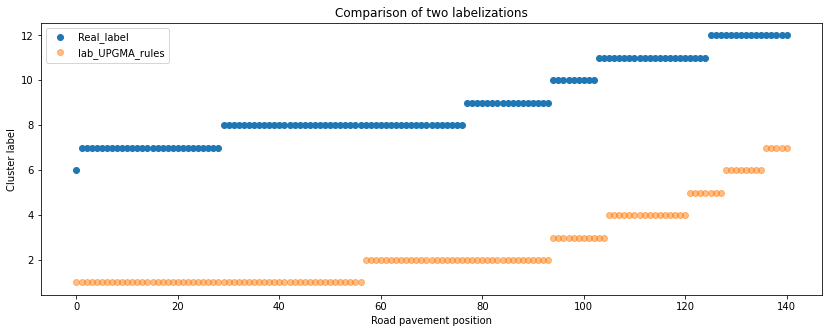

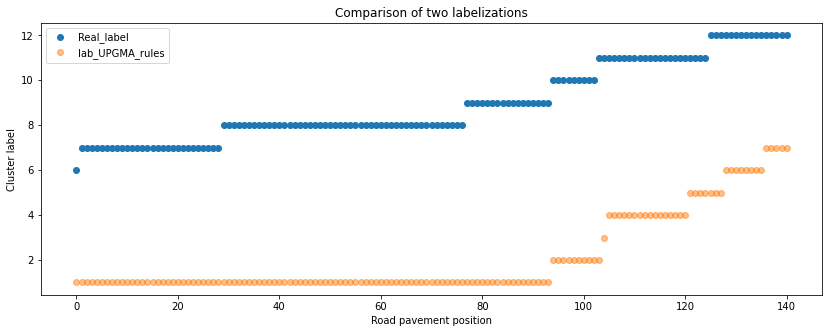

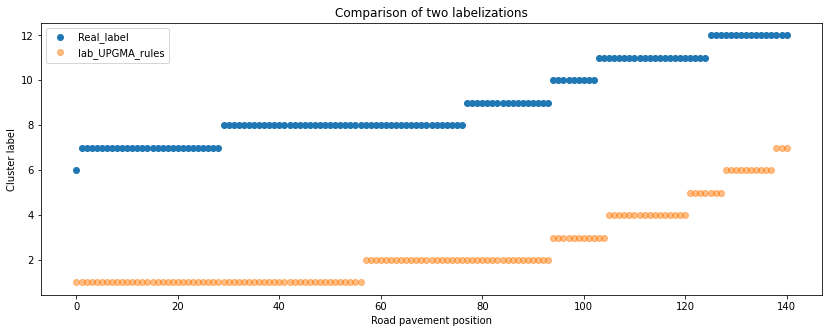

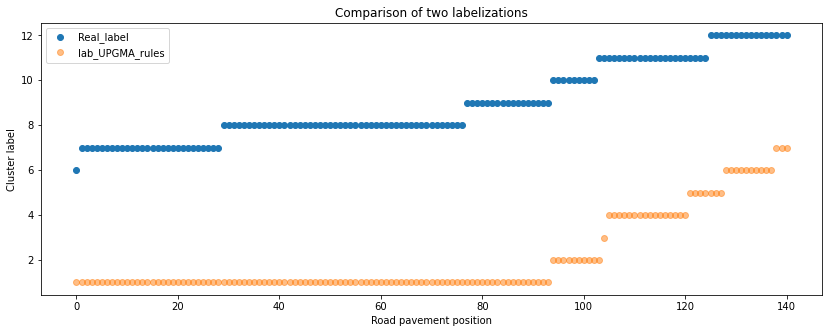

In [14]:
for clus_list in clusters:
    for k,c in enumerate(clus_list):
        c['lab_UPGMA_rules'] = k+1

    ans = pd.concat(clus_list)
    compare(df['Real_label'][cuts[i_cut]:cuts[i_cut+1]],ans.lab_UPGMA_rules)

### Hierarchy split

In [71]:
def split_hierarchy(X, rules, dist=None,threshold=0.8):
    m = len(rules)
    max_ind=np.zeros(m+1,dtype=int)
    max_dist=np.zeros(m+1)
    for i in range(1,len(X)):
        clus_1=X[:i]
        clus_2=X[i:]
        d = UPGMA(clus_1,clus_2,dist)
        respect = [rule(clus_1)&rule(clus_2) for rule in rules]
        respect = np.cumprod(respect,dtype=bool)
        if d > max_dist[0]:
            max_ind[0] = i
            max_dist[0] = d
        for j,r in enumerate(respect):
            if r:
                if d>max_dist[j+1]:
                    max_ind[j+1] = i
                    max_dist[j+1] = d
    
    k = max_ind[0]
    split = X[:k],X[k:]
    for i in range(1,m+1):
        if max_ind[i] !=0:
            if max_dist[i]> (threshold * max_dist[0]):
                k = max_ind[i]
                split = X[:k],X[k:]
            else:
                return split
    return split

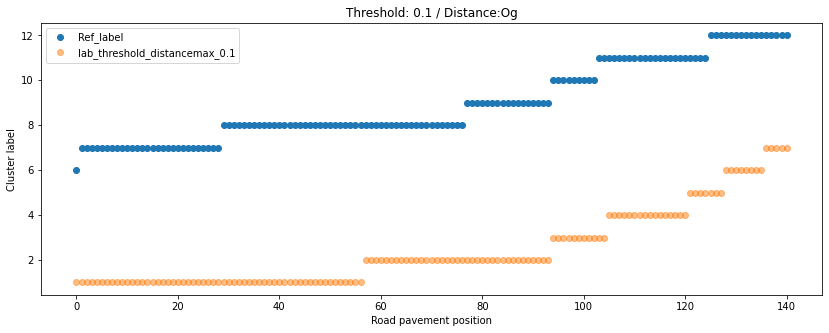

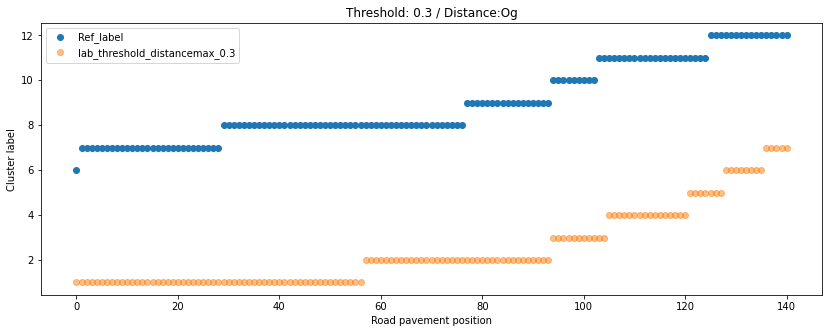

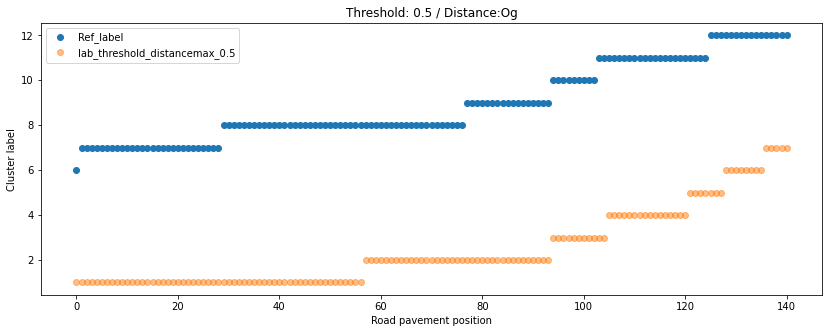

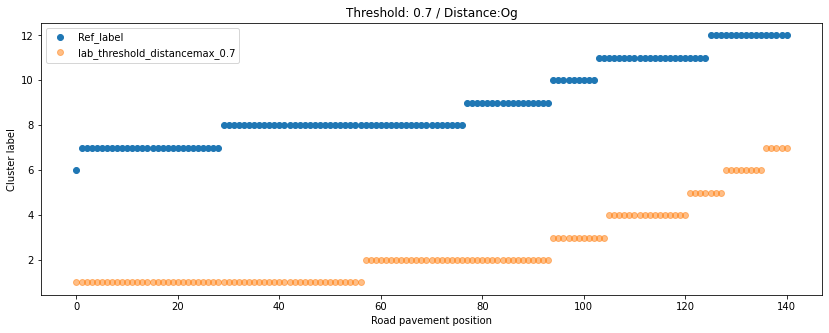

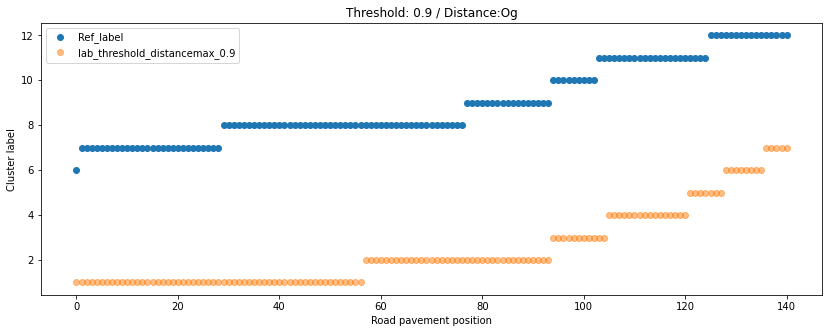

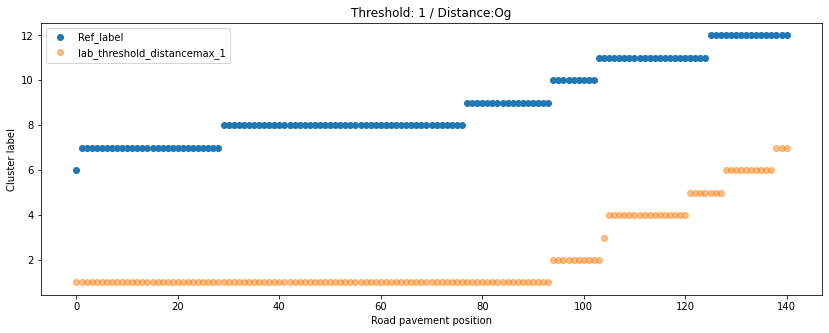

In [76]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
rules = [rules_length_min,rules_length_max,rules_measure,rules_year]
thresholds = [0.1,0.3,0.5,0.7,0.9,1]
dist_labels = ["Og", "Norm", "Norm_wo_dist"]

for l,dist in enumerate([dist_og]):
    for t in thresholds:
        clusters = [X_cut]
        for i in range(n_split):
            i = np.argmax([len(c) for c in clusters])
            X_new1,X_new2=split_hierarchy(clusters[i],rules,dist,threshold=t)
            clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

        for k,c in enumerate(clusters):
            col = 'lab_threshold_distancemax_'+str(t)
            c[col] = k+1

        ans = pd.concat(clusters)
        compare(df['Ref_label'][cuts[i_cut]:cuts[i_cut+1]],ans[col],title='Threshold: '+str(t) + ' / Distance:'+ dist_labels[l])


### Compare distance matrices

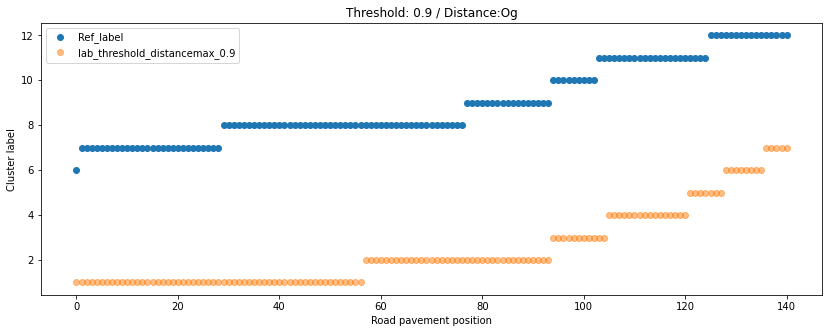

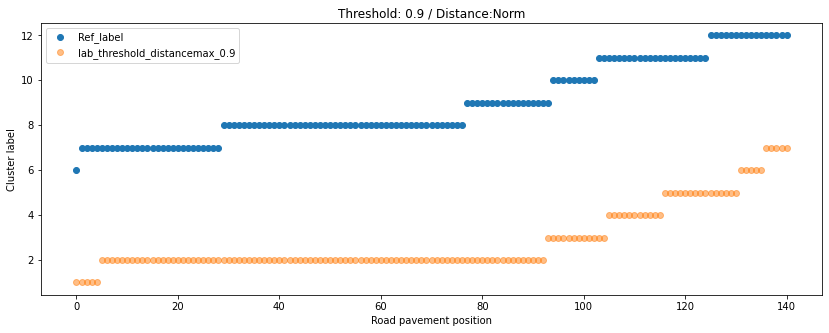

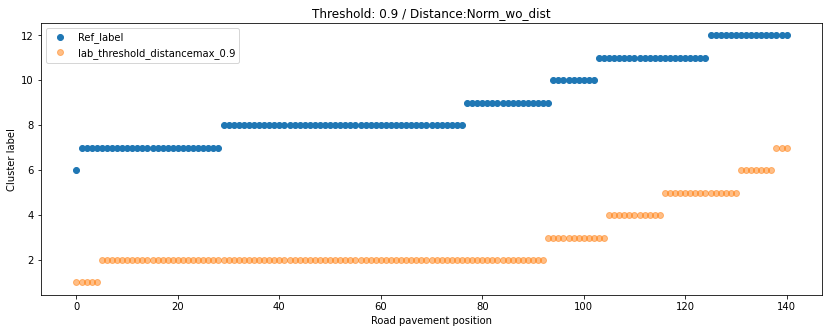

In [83]:
i_cut=2
X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()

n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1
rules = [rules_length_min,rules_length_max,rules_measure,rules_year]
thresholds = [0.9] # [0.1,0.3,0.5,0.7,0.9,1]
dist_labels = ["Og", "Norm", "Norm_wo_dist"]

for l,dist in enumerate([dist_og,dist_norm,dist_norm_wod]):
    for t in thresholds:
        clusters = [X_cut]
        for i in range(n_split):
            i = np.argmax([len(c) for c in clusters])
            X_new1,X_new2=split_hierarchy(clusters[i],rules,dist,threshold=t)
            clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

        for k,c in enumerate(clusters):
            col = 'lab_threshold_distancemax_'+str(t)
            c[col] = k+1

        ans = pd.concat(clusters)
        compare(df['Ref_label'][cuts[i_cut]:cuts[i_cut+1]],ans[col],title='Threshold: '+str(t) + ' / Distance:'+ dist_labels[l])


### Results of Divisive

In [ ]:
rules = [rules_length_min,rules_length_max,rules_measure,rules_year]
t = 0.9 
dist_labels = ["Og", "Norm", "Norm_wo_dist"]

try :
    to_save = pd.read_excel('data/first_axis_labels.xlsx')
except :
    to_save = X.copy()

for i_cut in range(n_cut-1):
    X_cut = X_norm[cuts[i_cut]:cuts[i_cut+1]].copy()

    n_split = len(np.unique(y[cuts[i_cut]:cuts[i_cut+1]]))-1


    clusters = [X_cut]
    for i in range(n_split):
        i = np.argmax([len(c) for c in clusters])
        X_new1,X_new2=split_hierarchy(clusters[i],rules,dist,threshold=t)
        clusters = clusters[:i] + [X_new1,X_new2] + clusters[i+1:]

    for k,c in enumerate(clusters):
        col = 'lab_threshold_distancemax_'+str(t)
        c[col] = k+1

    ans = pd.concat(clusters)
    compare(df['Ref_label'][cuts[i_cut]:cuts[i_cut+1]],ans[col],title='Threshold: '+str(t) + ' / Distance:'+ dist_labels[l])



    to_save['Divi_label_Th0.9'].loc[ans.index] = ans['lab_threshold_distancemax_0.9'] + max(to_save['Divi_label_Th0.9'])
to_save['Divi_label_Th0.9'] = to_save['Divi_label_Th0.9'] -1
to_save.to_excel('data/first_axis_labels.xlsx', index=False)


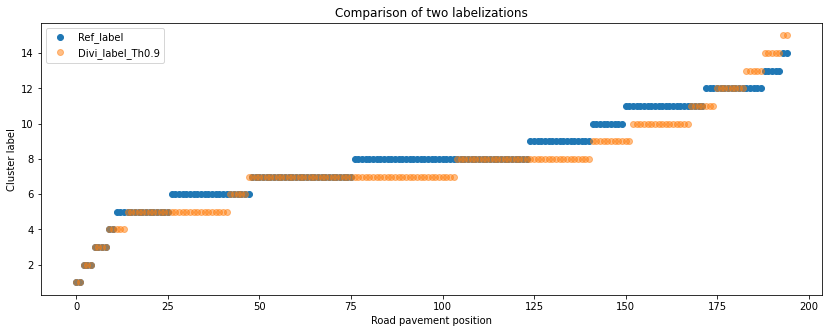

In [103]:
df = pd.read_excel('data/first_axis_labels.xlsx')
compare(df.Ref_label,df['Divi_label_Th0.9'])

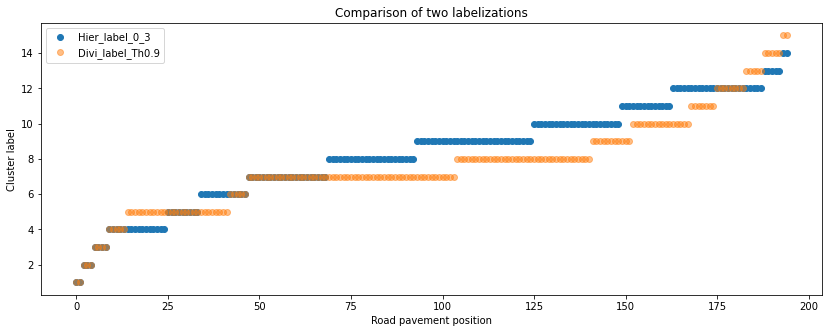

In [104]:
compare(df.Hier_label_0_3,df['Divi_label_Th0.9'])

## Cluster homogeneity / Indicators

In [2]:
df=pd.read_excel('data/first_axis_labels.xlsx')
columns = ['distance axe début m', 'I1', 'I2', 'I3','Structure_AgeC1', "% fissurestotal"]


In [ ]:
df[df.Ref_label.isin([10,11,12])][columns+['Ref_label','Kmeans_label_1_3']]

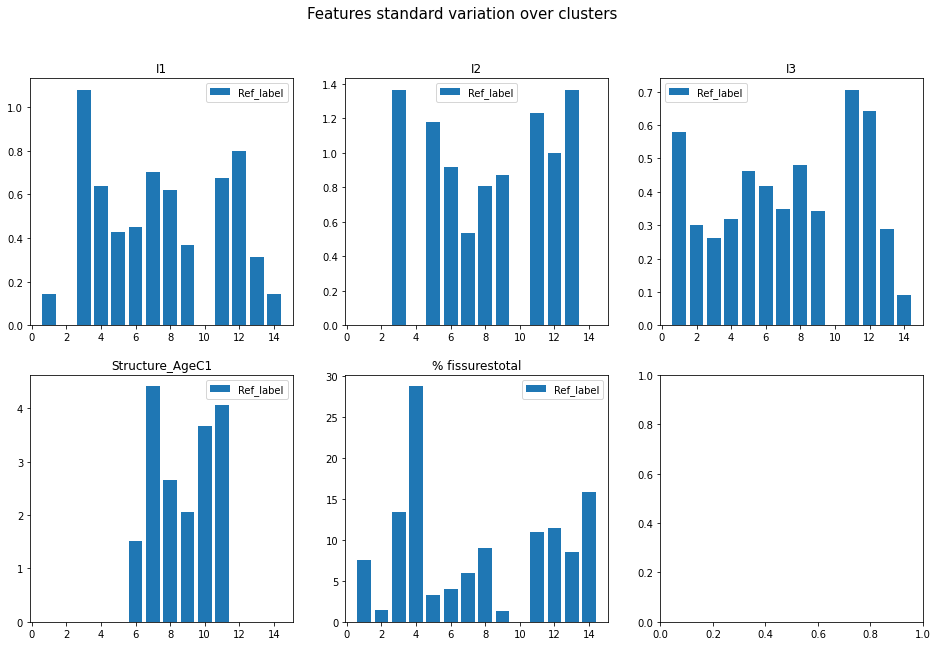

In [91]:
label = "Ref_label"

X = df.groupby(label).std()[columns]

fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.bar(adjust(X.index), X[columns[i+1]], label=label)
        ax.set_title(columns[i+1])
        ax.legend()
plt.suptitle('Features standard variation over clusters',fontsize=15)
plt.show()

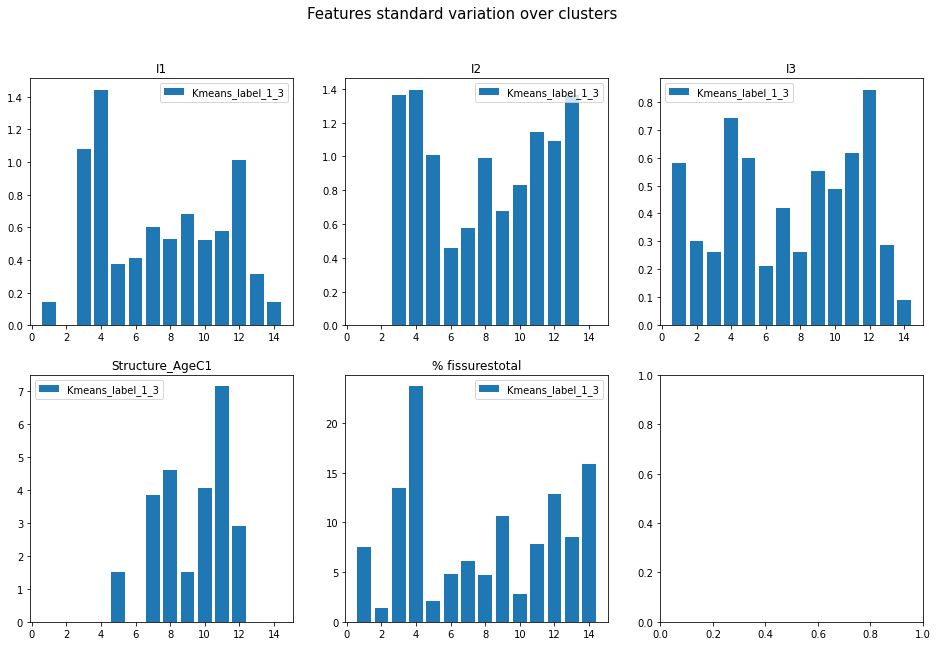

In [90]:
label = "Kmeans_label_1_3"

X = df.groupby(label).std()[columns]

fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.bar(adjust(X.index), X[columns[i+1]], label=label)
        ax.set_title(columns[i+1])
        ax.legend()
plt.suptitle('Features standard variation over clusters',fontsize=15)
plt.show()

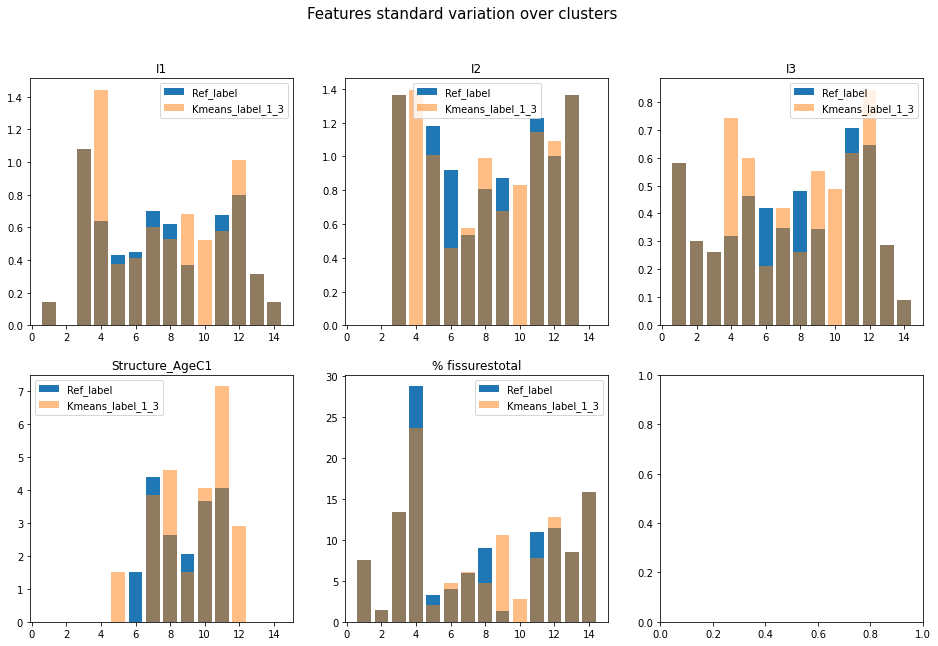

In [88]:
label = "Kmeans_label_1_3"

X = df.groupby('Kmeans_label_1_3').std()[columns]
X_ref = df.groupby('Ref_label').std()[columns]

fig,axes = plt.subplots((len(columns)-2)//3 + 1 ,3, figsize=(16,10))
for i,ax in enumerate(axes.flatten()):
    if i < len(columns)-1:
        ax.bar(adjust(X_ref.index), X_ref[columns[i+1]], label='Ref_label')
        ax.bar(adjust(X.index), X[columns[i+1]], alpha =0.5, label=label)
        ax.set_title(columns[i+1])
        ax.legend()
plt.suptitle('Features standard variation over clusters',fontsize=15)
plt.show()

### Measures homogeneity per clusters

In [106]:
label = "Ref_label"

data = pd.read_excel(path+'first_axis.xlsx')
measures = data['Mesure optimale']
years = data['Année optimale']

df_m = df.copy()
df_m['Measure'] = measures
Xm = df_m.groupby(label)['Measure']

In [15]:
test = df_m['Divi_label_Th0.9'].dropna()
test.name

'Divi_label_Th0.9'

In [8]:
pd.concat([df_m['Measure'],df_m.Ref_label], axis=1)

,Measure,Ref_label
0,RT,1
1,RT,1
2,DO NOT,2
3,DO NOT,2
4,DO NOT,2
...,...,...
190,RS,15
191,RS,15
192,RT,15
193,RT,16


In [34]:
def measure_homogeneity_aux(x):
    v = x.value_counts()
    optimal_percent = max(v)/sum(v) * 100

    optimal_measure = v.idxmax()
    k_max=0
    i=0
    while i < len(x):
        if (x.iloc[i]==optimal_measure):
            i+=1
        else:
            j = 1
            k=1
            while ((i+j)<len(x)):
                if (x.iloc[i+j]==x.iloc[i]):
                    j= j+1
                    k = k+1
                else:
                    j = len(x)
            k_max = max(k_max,k)
            i = i+k
    return (np.round(optimal_percent,1), k_max)

def measure_homogeneity(labels, measures):
    x = pd.concat([labels,measures.loc[labels.index]],axis=1).groupby(labels.name)[measures.name]
    res = x.apply(measure_homogeneity_aux)
    return pd.concat([res.apply(lambda x: x[0]),res.apply(lambda x: x[1])],axis=1).set_axis(['Meas_pourcent','Diff_meas_block'],axis=1)
    

In [245]:
test = df_m[df_m[label]==7].Measure

In [36]:
measure_homogeneity(df_m.Ref_label, measures)

,Meas_pourcent,Diff_meas_block
Ref_label,,
1,100.0,0
2,100.0,0
3,50.0,2
4,100.0,0
5,46.7,3
6,81.8,3
7,57.1,7
8,54.2,5
10,70.6,3


### Rules respect per clusters

In [50]:
def respect_clusters(labels,measures=measures_ref,years=years_ref):
    x = pd.concat([labels,measures.loc[labels.index]],axis=1).groupby(labels.name)
    res = pd.concat([x.apply(rules_length_min),
            x.apply(rules_length_max),
            x.apply(rules_measure,measures),
            x.apply(rules_year,years)],axis=1)
    return res.set_axis(['Respect_minL','Respect_maxL','Respect_meas','Respect_year'],axis=1)

respect_clusters(df_m.Ref_label,measures,years)

,Respect_minL,Respect_maxL,Respect_meas,Respect_year
Ref_label,,,,
1,False,True,True,True
2,False,True,True,True
3,False,True,True,False
4,False,True,True,True
5,True,True,True,False
6,True,True,True,False
7,True,True,False,False
8,True,False,False,False
10,True,True,True,False


### Year diff / lenght per clusters

In [60]:
def year_diff(labels,years=years_ref):
    x = pd.concat([labels,years.loc[labels.index]],axis=1).groupby(labels.name)[years.name]
    res = x.apply(lambda x: max(x)-min(x))
    return res.rename('Year_diff')

def lenght_clusters(labels):
    x = pd.concat([labels,years.loc[labels.index]],axis=1).groupby(labels.name)
    res = x.apply(lambda x: len(x))
    return res.rename('Lenght')



In [ ]:
def all_stats_clusters(labels,measures=measures_ref,years=years_ref):
    return pd.concat([respect_clusters(labels,measures,years),
            lenght_clusters(labels),
            measure_homogeneity(labels,measures),
            year_diff(labels,years)],axis=1)


In [107]:
all_stats_clusters(df_m.Ref_label)

,Respect_minL,Respect_maxL,Respect_meas,Respect_year,Lenght,Meas_pourcent,Diff_meas_block,Year_diff
Ref_label,,,,,,,,
1,False,True,True,True,2,100.0,0,0
2,False,True,True,True,3,100.0,0,0
3,False,True,True,False,4,50.0,2,7
4,False,True,True,True,2,100.0,0,0
5,True,True,True,False,15,46.7,3,12
6,True,True,True,False,22,81.8,3,14
7,True,True,False,False,28,57.1,7,20
8,True,False,False,False,48,54.2,5,14
10,True,True,True,False,17,70.6,3,26


In [108]:
all_stats_clusters(df_m['Divi_label_Th0.9'])

,Respect_minL,Respect_maxL,Respect_meas,Respect_year,Lenght,Meas_pourcent,Diff_meas_block,Year_diff
Divi_label_Th0.9,,,,,,,,
1,False,True,True,True,2,100.0,0,0
2,False,True,True,True,3,100.0,0,0
3,False,True,True,False,4,50.0,2,7
4,True,True,True,False,5,80.0,1,8
5,True,True,True,False,28,53.6,4,13
6,True,True,True,False,5,100.0,0,9
7,True,False,False,False,57,54.4,9,24
8,True,True,True,False,37,62.2,3,26
9,True,True,True,False,11,81.8,2,17


In [109]:
all_stats_clusters(df_m.Hier_label_1_3)

,Respect_minL,Respect_maxL,Respect_meas,Respect_year,Lenght,Meas_pourcent,Diff_meas_block,Year_diff
Hier_label_1_3,,,,,,,,
1,False,True,True,True,2,100.0,0,0
2,False,True,True,True,3,100.0,0,0
3,False,True,True,False,4,50.0,2,7
4,True,True,True,False,16,43.8,3,12
5,True,True,True,False,9,55.6,3,8
6,True,True,True,False,13,100.0,0,9
7,True,True,True,False,22,72.7,4,18
8,True,True,True,False,24,54.2,3,24
9,True,True,False,False,32,53.1,5,12
